In [9]:
# Import required libraries
import pandas as pd
import src.classify_generic as cg
import src.format_data as fd
import src.tool_functions as dlbclass
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [10]:
####################################
#  *** Change variables here! ***  #
#   Afterwards, run all cells via  #
#     menu: Cell -> Run All        # 
####################################

# Replace gsm_file with your GSM file name to classify your own data
gsm_file = './gsm/DLBCL_testset_gsm.tsv'

# Set your cohort name
output_dir = './classifications/'
cohort = 'testset'

In [11]:
classified_samples = dlbclass.classify_samples(gsm_file, cohort)
classified_samples = classified_samples.sort_values(by=['PredictedCluster', 'Confidence'], ascending=[True, True])
classified_samples

Predictions will be written to:

 ./classifications/testset_classified_samples.tsv
loaded neural networks
Classifying 149 samples...
Done!


,C1,C2,C3,C4,C5,Confidence,PredictedCluster
sample,,,,,,,
DLBCL_LS4394,0.450731,0.292742,0.199886,0.043201,0.013440,0.450731,C1
DFCIDL001_DT,0.529631,0.111915,0.180566,0.164177,0.013712,0.529631,C1
DLBCL10506,0.538373,0.033925,0.049077,0.354200,0.024424,0.538373,C1
DLBCL_C_D_1132_NULLPAIR,0.586898,0.011434,0.034928,0.255882,0.110857,0.586898,C1
DLBCL_C_D_1158_NULLPAIR,0.639201,0.125140,0.029461,0.187542,0.018656,0.639201,C1
...,...,...,...,...,...,...,...
DLBCL_MC_F339_JPS2,0.003073,0.004296,0.003682,0.006001,0.982949,0.982949,C5
DLBCL_RICOVER_704,0.004389,0.003721,0.003588,0.004463,0.983840,0.983840,C5
DLBCL11451,0.002175,0.005450,0.002694,0.003334,0.986346,0.986346,C5


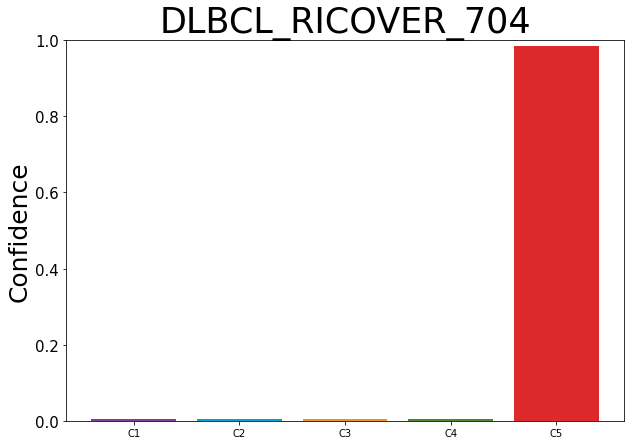

C1                  0.004389
C2                  0.003721
C3                  0.003588
C4                  0.004463
C5                   0.98384
Confidence           0.98384
PredictedCluster          C5
Name: DLBCL_RICOVER_704, dtype: object

In [12]:
###########################################################
#              Individual sample bar plots.               #
# Replace sample = '...' with the sample you want to see. #
###########################################################

# Change this here, and rerun this cell with the '>Run' button.
sample = 'DLBCL_RICOVER_704'
#


dlbclass.plot_sample_barplot(sample, classified_samples)
classified_samples.loc[sample]

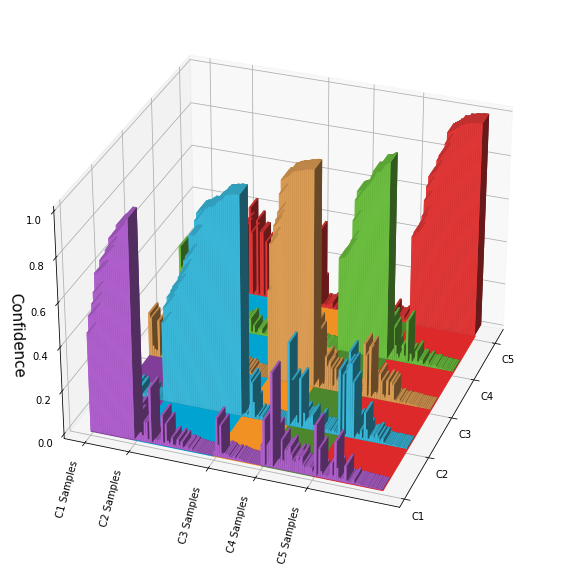

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# set up the figure and axes
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(projection='3d')
ax1.view_init(elev=30, azim=20)


y = np.repeat(np.array(range(149)), 5)  # sample index
x = [1,2,3,4,5] * 149  # cluster
z = np.zeros_like(x)  # base coordinate (sits on bottom = 0)
dx = 0.3
dy = 1
dz = classified_samples.iloc[:, 0:5].values.ravel() # confidence height
colors_bar = ["#c56ce6", "#40cef5", "#f7af5e", "#79d647", "#fc3d3d"] * 149
colors_plane = ["#803e98", "#00a4d1", "#f29123", "#4d872d", "#dd2929"]

total = 0
yticks = []
for i, c in enumerate(['C1', 'C2', 'C3', 'C4', 'C5']):
    col = colors_plane[i]
    n_clus = sum(classified_samples['PredictedCluster'] == c)
    yticks.append(total)
    p_x = [1,1,5,5]
    p_y = [total,total+n_clus,total+n_clus,total]
    p_z = [0,0,0,0]
    verts = [list(zip(p_x,p_y,p_z))]
    ax1.add_collection3d(Poly3DCollection(verts, color=col))
    total += n_clus

ax1.bar3d(x, y, z, dx, dy, dz, color=colors_bar, shade=True)
ax1.invert_xaxis()
ax1.set_xlim(5.3, 0.9)
ax1.set_xticks([1,2,3,4,5])
ax1.set_yticks(yticks)
ax1.set_xticklabels(['C1', 'C2', 'C3', 'C4', 'C5'])
ax1.set_yticklabels([x + ' Samples' for x in ['  C1', '  C2', '  C3', '  C4', '  C5']], 
                    rotation=75, ha="right")
ax1.set_zlabel('Confidence', size=15)

plt.show()

fig.savefig('3d_confidence_plot_test.pdf')